In [84]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import matplotlib.pyplot as plt
import hdbscan

from optparse import OptionParser
import sys
from time import time

import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns

%matplotlib inline

In [71]:
df =  pd.read_csv('holczer_LS_fit_Sep14.csv')

In [72]:
df

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
0,1.01,2.853987,1.328642e-02,-8.143485,2.470613,7.051100
1,2.01,2.008973,5.490948e-02,7.463235,2.204735,4.429253
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
3,5.01,10.926648,5.987540e-01,1.808215,4.780328,52.232961
4,7.01,2.584302,1.169016e+00,6.161470,3.213669,8.305091
...,...,...,...,...,...,...
2594,5958.01,3.532934,3.029475e+01,-1.158730,226.496097,800.195790
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784
2596,5968.01,2.866667,3.449107e+01,11.146999,97.942772,280.769281
2597,5969.01,14.000000,2.376538e+02,2.052101,163.869589,2294.174246


In [73]:
df.describe()

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
count,2599.000000,2565.000000,2.565000e+03,2.565000e+03,2565.000000,2565.000000
mean,2069.717049,17.413376,3.157801e+15,1.688438e+04,47.751936,393.055469
std,1646.054110,60.732012,3.748421e+16,5.452165e+05,63.655382,601.890228
min,1.010000,2.000000,1.328642e-02,-8.143485e+00,0.582895,1.901285
25%,718.025000,2.772221,7.466855e+00,9.492381e+00,9.034196,46.995180
50%,1751.010000,4.642378,1.690793e+01,2.527982e+01,20.381773,149.956621
75%,2861.010000,11.690273,3.975678e+01,6.681748e+01,53.717990,460.769161
max,5970.010000,1382.297533,9.530673e+17,2.527460e+07,305.612404,2934.187820


In [74]:
df = df.dropna()

In [75]:
df

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
0,1.01,2.853987,1.328642e-02,-8.143485,2.470613,7.051100
1,2.01,2.008973,5.490948e-02,7.463235,2.204735,4.429253
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
3,5.01,10.926648,5.987540e-01,1.808215,4.780328,52.232961
4,7.01,2.584302,1.169016e+00,6.161470,3.213669,8.305091
...,...,...,...,...,...,...
2594,5958.01,3.532934,3.029475e+01,-1.158730,226.496097,800.195790
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784
2596,5968.01,2.866667,3.449107e+01,11.146999,97.942772,280.769281
2597,5969.01,14.000000,2.376538e+02,2.052101,163.869589,2294.174246


In [76]:
df = df[df['delta_BIC'] > 10]

In [77]:
# Create a list of DataFrames, where each DataFrame represents a unique value in the 'KOI' column
holczer_catalog_by_koi = [group_df for _, group_df in df.groupby('KOI')]
holczer_catalog_by_koi

[    KOI  P_ttv [cycles]  amplitude_ttv [min]  delta_BIC     P_lin  \
 2  3.01         3.13883             0.105664  15.435857  4.887803   
 
    P_ttv [days]  
 2     15.341984  ,
      KOI  P_ttv [cycles]  amplitude_ttv [min]   delta_BIC      P_lin  \
 6  12.01       69.921847             1.153954  260.519694  17.855219   
 
    P_ttv [days]  
 6   1248.469909  ,
      KOI  P_ttv [cycles]  amplitude_ttv [min]  delta_BIC     P_lin  \
 8  17.01        3.368362             0.111276  10.630631  3.234699   
 
    P_ttv [days]  
 8     10.895637  ,
       KOI  P_ttv [cycles]  amplitude_ttv [min]   delta_BIC     P_lin  \
 13  41.02        2.267717            32.661551  241.972726  6.887125   
 
     P_ttv [days]  
 13      15.61805  ,
       KOI  P_ttv [cycles]  amplitude_ttv [min]   delta_BIC      P_lin  \
 14  41.03       28.048104             58.75323  101.518024  35.333128   
 
     P_ttv [days]  
 14    991.027235  ,
       KOI  P_ttv [cycles]  amplitude_ttv [min]    delta_BIC      P_l

/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/envs/DSFP/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


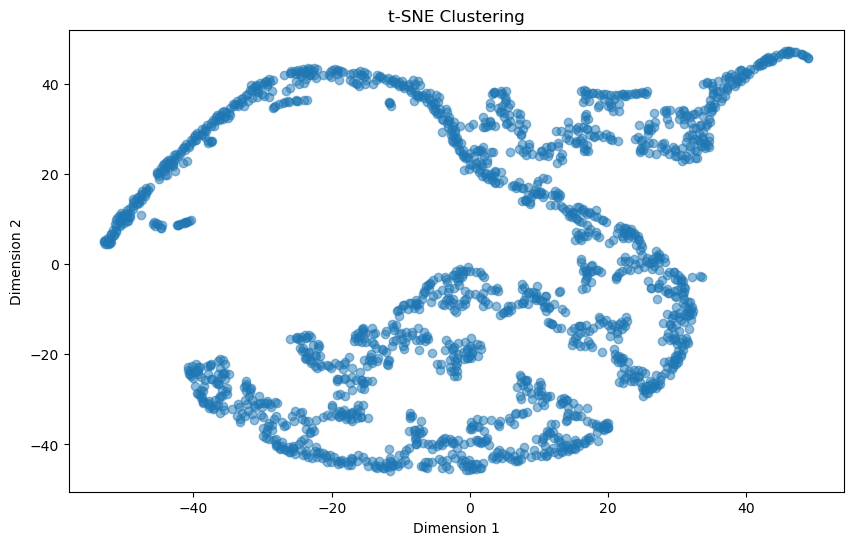

In [79]:
# Drop the 'KOI' column, as we don't want to cluster based on it
data = df.drop(columns=['KOI', 'P_ttv [days]', 'delta_BIC'])

# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data_scaled)

# Create a new DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Plot the t-SNE results as a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tsne_df['Dimension 1'], tsne_df['Dimension 2'], alpha=0.5)
plt.title('t-SNE Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



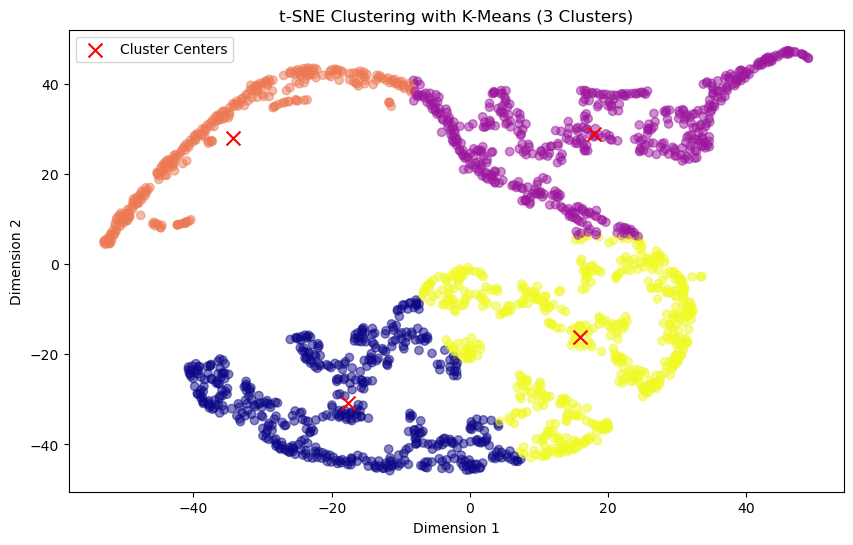

In [80]:
# Create a new DataFrame with t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])

# Perform K-Means clustering with three clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(tsne_df)

# Add cluster labels to the t-SNE DataFrame
tsne_df['Cluster'] = kmeans.labels_

# Plot the clustered data
plt.figure(figsize=(10, 6))
plt.scatter(
    tsne_df['Dimension 1'],
    tsne_df['Dimension 2'],
    c=tsne_df['Cluster'],
    cmap='plasma',
    alpha=0.5,
)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    c='red',
    marker='x',
    s=100,
    label='Cluster Centers',
)
plt.title('t-SNE Clustering with K-Means (3 Clusters)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()


In [81]:
df

,KOI,P_ttv [cycles],amplitude_ttv [min],delta_BIC,P_lin,P_ttv [days]
2,3.01,3.138830,1.056643e-01,15.435857,4.887803,15.341984
6,12.01,69.921847,1.153954e+00,260.519694,17.855219,1248.469909
8,17.01,3.368362,1.112757e-01,10.630631,3.234699,10.895637
13,41.02,2.267717,3.266155e+01,241.972726,6.887125,15.618050
14,41.03,28.048104,5.875323e+01,101.518024,35.333128,991.027235
...,...,...,...,...,...,...
2590,5945.01,2.000000,5.559508e+15,75.115233,40.719409,81.438817
2592,5952.01,16.000000,3.572241e+02,38.596757,164.439615,2631.033835
2593,5955.01,2.751445,3.713080e+01,25.975905,96.329085,265.044188
2595,5959.01,2.554113,7.188461e+01,16.715621,251.479044,642.305784


In [83]:
data

,P_ttv [cycles],amplitude_ttv [min],P_lin
2,3.138830,1.056643e-01,4.887803
6,69.921847,1.153954e+00,17.855219
8,3.368362,1.112757e-01,3.234699
13,2.267717,3.266155e+01,6.887125
14,28.048104,5.875323e+01,35.333128
...,...,...,...
2590,2.000000,5.559508e+15,40.719409
2592,16.000000,3.572241e+02,164.439615
2593,2.751445,3.713080e+01,96.329085
2595,2.554113,7.188461e+01,251.479044


/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_40950/1997127125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = clusterer.labels_


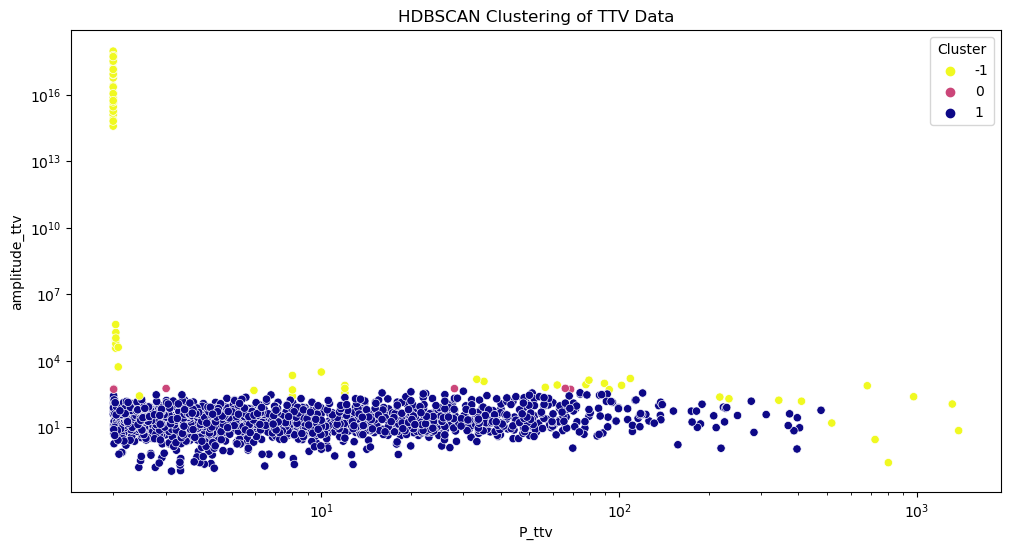

In [89]:
# Create and fit the HDBSCAN clustering model
clusterer = hdbscan.HDBSCAN(min_cluster_size=6, gen_min_span_tree=True)
clusterer.fit(data)

# Add cluster labels to the original DataFrame
df['cluster_label'] = clusterer.labels_

# Visualize the clusters
plt.figure(figsize=(12, 6))
palette = sns.color_palette('plasma_r', as_cmap=True)

# Scatter plot
sns.scatterplot(x='P_ttv [cycles]', y='amplitude_ttv [min]', hue='cluster_label', data=df, palette=palette)
plt.xlabel('P_ttv')
plt.ylabel('amplitude_ttv')
plt.title('HDBSCAN Clustering of TTV Data')
plt.legend(title='Cluster')
plt.yscale('log')
plt.xscale('log')
plt.show()


In [90]:
# Group the DataFrame by 'cluster_label' and aggregate 'KOI' values for each cluster
cluster_koi_mapping = df.groupby('cluster_label')['KOI'].apply(list).reset_index(name='KOI_list')

# Print or access the 'KOI' values for each cluster
for index, row in cluster_koi_mapping.iterrows():
    cluster_label = row['cluster_label']
    koi_list = row['KOI_list']
    print(f'Cluster {cluster_label}: {koi_list}')


Cluster -1: [139.01, 142.01, 202.01, 227.01, 282.02, 377.02, 492.01, 564.01, 645.02, 718.01, 738.02, 806.03, 854.01, 904.02, 984.01, 986.01, 1145.01, 1203.02, 1209.01, 1273.01, 1422.04, 1430.02, 1477.01, 1527.01, 1783.01, 1783.02, 1840.01, 1842.01, 1884.01, 1964.01, 1989.01, 2474.01, 2686.01, 2696.01, 2795.01, 3261.01, 3280.01, 3305.01, 3425.01, 3481.01, 3692.01, 3794.01, 4226.01, 4630.01, 4984.01, 5024.01, 5029.01, 5060.01, 5120.01, 5139.01, 5177.01, 5208.01, 5214.01, 5240.01, 5247.01, 5248.01, 5289.01, 5300.01, 5321.01, 5329.01, 5387.01, 5453.01, 5455.01, 5528.01, 5535.01, 5631.01, 5653.01, 5715.01, 5721.01, 5749.01, 5788.01, 5815.01, 5874.01, 5886.01, 5945.01]
Cluster 0: [377.01, 448.02, 474.03, 2640.01, 3474.01, 5586.01]
Cluster 1: [3.01, 12.01, 17.01, 41.02, 41.03, 42.01, 46.01, 49.01, 63.01, 70.01, 70.02, 70.03, 70.05, 72.01, 72.02, 75.01, 82.02, 82.03, 82.04, 84.01, 85.01, 85.02, 85.03, 89.01, 89.02, 92.01, 94.01, 94.02, 94.03, 94.04, 100.01, 103.01, 105.01, 107.01, 108.01, 108.

/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_40950/1005534988.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster_label'] = clusterer.labels_


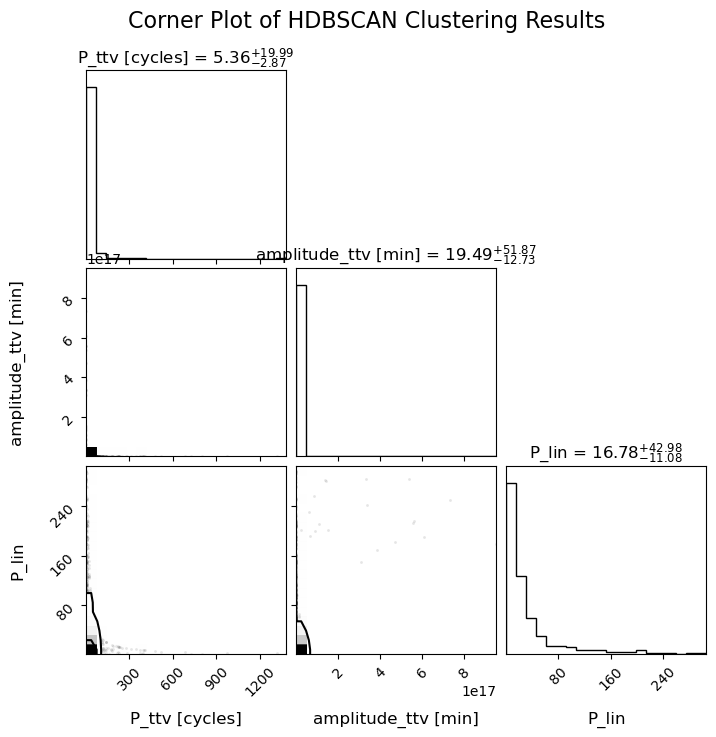

In [99]:
import corner

# Add cluster labels to the original DataFrame
df['cluster_label'] = clusterer.labels_

# Create a DataFrame containing only the cluster labels and the selected dimensions
cluster_data = df[['cluster_label', 'P_ttv [cycles]', 'amplitude_ttv [min]', 'P_lin']]

# Generate unique colors for each cluster label
n_clusters = len(np.unique(cluster_data['cluster_label']))
colors = plt.cm.jet(np.linspace(0, 1, n_clusters))

# Plot a corner plot for the selected dimensions with cluster colors
corner_plot = corner.corner(
    cluster_data.drop(columns=['cluster_label']),  # Remove cluster_label for the plot
    labels=cluster_data.columns[1:],  # Exclude 'cluster_label' from labels
    # color=colors[cluster_data['cluster_label']],  # Use cluster-specific colors
    label_kwargs={'fontsize': 12},
    show_titles=True,
    # title_kwargs={"fontsize": 14},
    # quantiles=[0.16, 0.5, 0.84],  # Add quantile lines
)

# Customize the corner plot as needed
plt.suptitle('Corner Plot of HDBSCAN Clustering Results', fontsize=16)
plt.subplots_adjust(top=0.9)  # Adjust the top spacing for the title

# Show the plot
plt.show()


/var/folders/6b/q0ls5s7570d8s04fbvw5gmxw0000gn/T/ipykernel_40950/242313257.py:13: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='cluster_label', data=tsne_df, palette=palette)


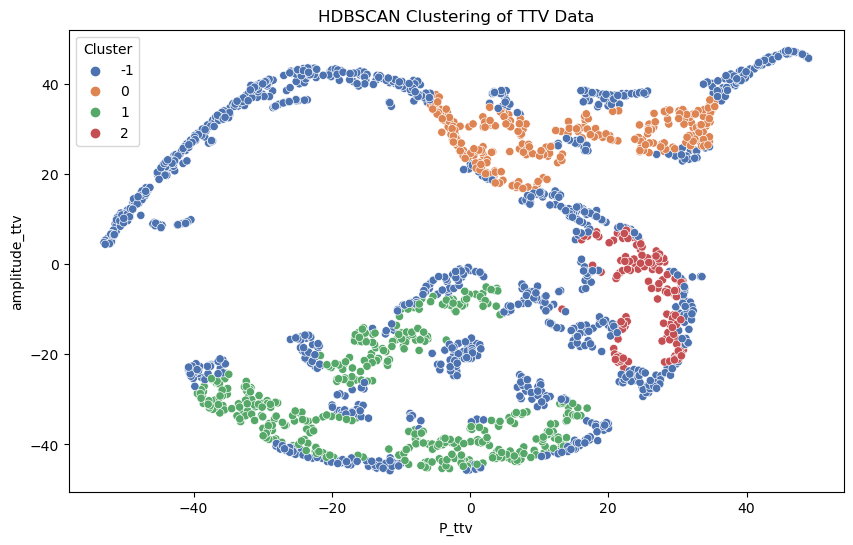

In [91]:
# Create and fit the HDBSCAN clustering model
clusterer = hdbscan.HDBSCAN(min_cluster_size=100, gen_min_span_tree=True)
clusterer.fit(tsne_df)

# Add cluster labels to the original DataFrame
tsne_df['cluster_label'] = clusterer.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
palette = sns.color_palette('deep', as_cmap=True)

# Scatter plot
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='cluster_label', data=tsne_df, palette=palette)
plt.xlabel('P_ttv')
plt.ylabel('amplitude_ttv')
plt.title('HDBSCAN Clustering of TTV Data')
plt.legend(title='Cluster')
plt.show()

In [92]:
# Group the DataFrame by 'cluster_label' and aggregate 'KOI' values for each cluster
cluster_koi_mapping = tsne_df.groupby('cluster_label')['KOI'].apply(list).reset_index(name='KOI_list')

# Print or access the 'KOI' values for each cluster
for index, row in cluster_koi_mapping.iterrows():
    cluster_label = row['cluster_label']
    koi_list = row['KOI_list']
    print(f'Cluster {cluster_label}: {koi_list}')

KeyError: 'Column not found: KOI'